In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

file_path = '../Data_clean/Testing_data/Locus/'
sensors = ['2.T01', '2.T02', '2.T03', '2.T04' ]
alta_path = '../Data_clean/Testing_data/Alta/2.P02_processed.xlsx'

Average count for Alta sensor between 11:00 and 12:30: 274.77777777777777


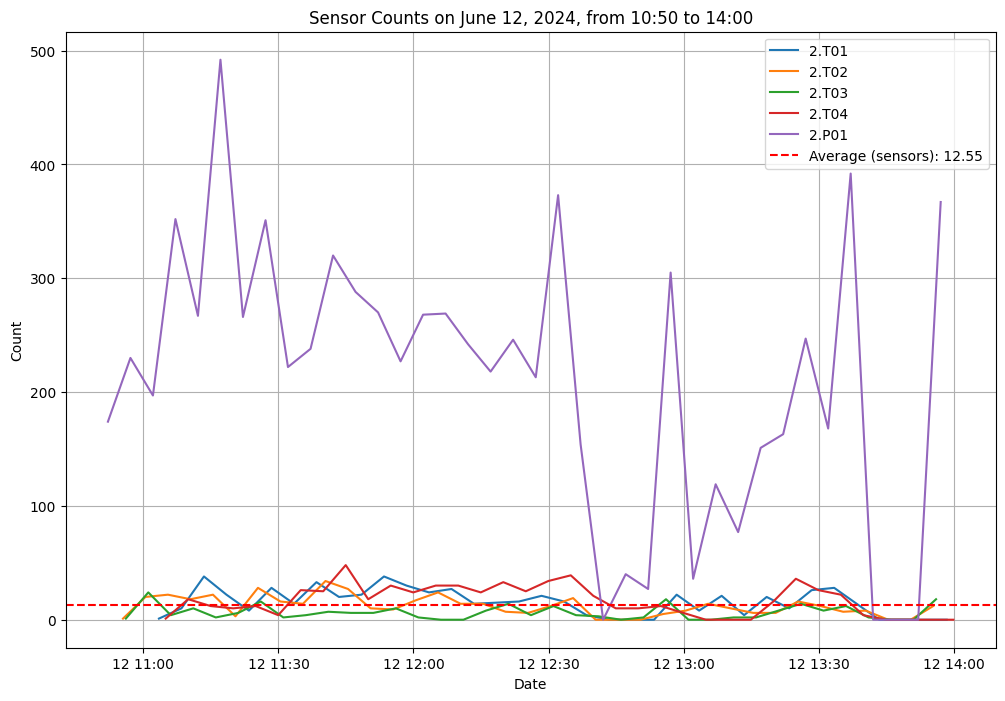

In [25]:

import os

dfs = []


for sensor in sensors:
    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')
    df = pd.read_excel(file_name, parse_dates=['Date'])
    df['Sensor'] = sensor
    dfs.append(df)


alta_df = pd.read_excel(alta_path, parse_dates=['Date'])
alta_df['Sensor'] = '2.P01'
dfs.append(alta_df)
concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df['Count'] = pd.to_numeric(concatenated_df['Count'], errors='coerce')

start_time = '2024-06-12 10:50:00'
end_time = '2024-06-12 14:00:00'
mask = (concatenated_df['Date'] >= start_time) & (concatenated_df['Date'] <= end_time)
filtered_df = concatenated_df[mask]

overall_avg = filtered_df[filtered_df['Sensor'].isin(sensors)]['Count'].mean()

alta_start_time = '2024-06-12 11:00:00'
alta_end_time = '2024-06-12 12:30:00'
alta_mask = (alta_df['Date'] >= alta_start_time) & (alta_df['Date'] <= alta_end_time)
alta_avg = alta_df[alta_mask]['Count'].mean()

print(f'Average count for Alta sensor between 11:00 and 12:30: {alta_avg}')

plt.figure(figsize=(12, 8))

for sensor in sensors:
    sensor_data = filtered_df[filtered_df['Sensor'] == sensor]
    plt.plot(sensor_data['Date'], sensor_data['Count'], label=sensor)

alta_sensor_data = filtered_df[filtered_df['Sensor'] == '2.P01']
plt.plot(alta_sensor_data['Date'], alta_sensor_data['Count'], label='2.P01')

plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Average (sensors): {overall_avg:.2f}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sensor Counts on June 12, 2024, from 10:50 to 14:00')
plt.legend()
plt.grid(True)
plt.show()


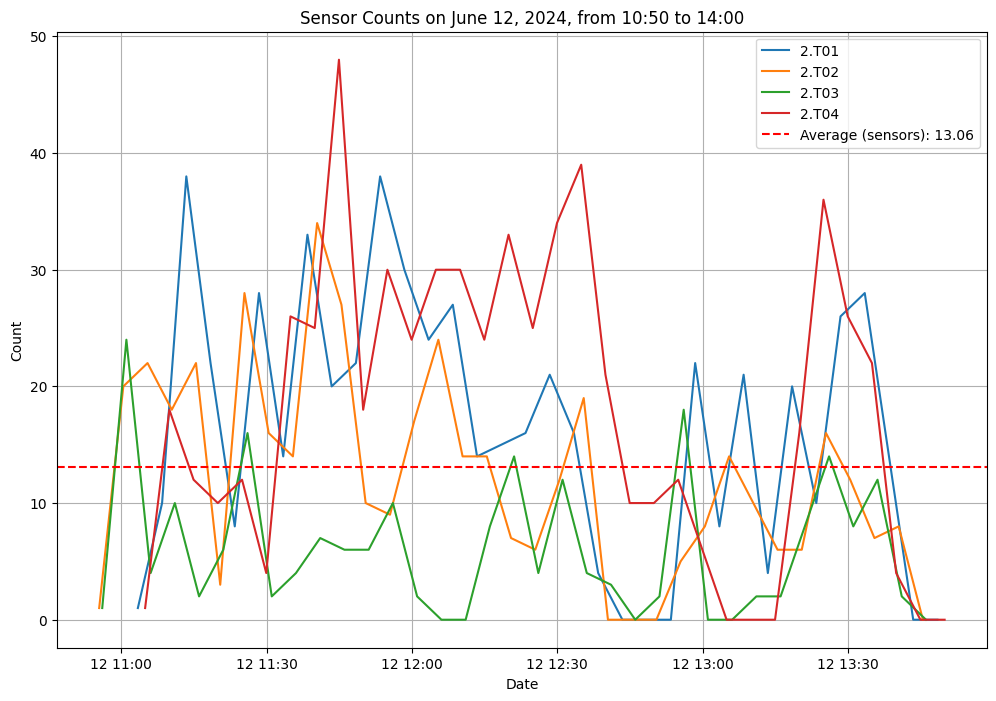

In [36]:
dfs = []


for sensor in sensors:
    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')
    df = pd.read_excel(file_name, parse_dates=['Date'])
    df['Sensor'] = sensor
    dfs.append(df)


concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df['Count'] = pd.to_numeric(concatenated_df['Count'], errors='coerce')

start_time = '2024-06-12 10:50:00'
end_time = '2024-06-12 13:50:00'
mask = (concatenated_df['Date'] >= start_time) & (concatenated_df['Date'] <= end_time)
filtered_df = concatenated_df[mask]

overall_avg = filtered_df[filtered_df['Sensor'].isin(sensors)]['Count'].mean()



plt.figure(figsize=(12, 8))

for sensor in sensors:
    sensor_data = filtered_df[filtered_df['Sensor'] == sensor]
    plt.plot(sensor_data['Date'], sensor_data['Count'], label=sensor)




plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Average (sensors): {overall_avg:.2f}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sensor Counts on June 12, 2024, from 10:50 to 14:00')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths
file_path = '../Data_clean/Testing_data/Locus/'
sensors = ['2.T01', '2.T02', '2.T03', '2.T04']
alta_path = '../Data_clean/Testing_data/Alta/2.P02_processed.xlsx'
dfs = []

# Read Locus sensor files
for i, sensor in enumerate(sensors, start=1):
    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')
    df = pd.read_excel(file_name, parse_dates=['Date'])
    df['Sensor'] = f'Locus {i}'
    dfs.append(df)

# Read Alta sensor file
alta_df = pd.read_excel(alta_path, parse_dates=['Date'])
alta_df['Sensor'] = 'Alta sensor'
dfs.append(alta_df)

# Concatenate all dataframes
concatenated_df = pd.concat(dfs, ignore_index=True)

# Convert 'Count' to numeric, coercing errors
concatenated_df['Count'] = pd.to_numeric(concatenated_df['Count'], errors='coerce')

# Filter data by date and time range
start_time = '2024-06-12 10:50:00'
end_time = '2024-06-12 14:00:00'
mask = (concatenated_df['Date'] >= start_time) & (concatenated_df['Date'] <= end_time)
filtered_df = concatenated_df[mask]

# Calculate overall average for Locus sensors
overall_avg = filtered_df[filtered_df['Sensor'].str.startswith('Locus')]['Count'].mean()

# Calculate average for Alta sensor
alta_start_time = '2024-06-12 11:00:00'
alta_end_time = '2024-06-12 12:30:00'
alta_mask = (alta_df['Date'] >= alta_start_time) & (alta_df['Date'] <= alta_end_time)
alta_avg = alta_df[alta_mask]['Count'].mean()

print(f'Average count for Alta sensor between 11:00 and 12:30: {alta_avg}')

# Plotting
plt.figure(figsize=(12, 6), dpi=1200)

# Plot Locus sensors
for sensor in ['Locus 1', 'Locus 2', 'Locus 3', 'Locus 4']:
    sensor_data = filtered_df[filtered_df['Sensor'] == sensor]
    plt.plot(sensor_data['Date'], sensor_data['Count'], label=sensor)

# Plot Alta sensor
alta_sensor_data = filtered_df[filtered_df['Sensor'] == 'Alta sensor']
plt.plot(alta_sensor_data['Date'], alta_sensor_data['Count'], label='Alta sensor')

# Add horizontal line for overall average
# plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Average of the : {overall_avg:.2f}')

# Set title and labels
plt.title('Alta movement sensor test', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Movement count / 5 min', fontsize=14)

# Format x-axis to show only hours and minutes
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Increase tick parameters for better visibility
plt.tick_params(axis='both', which='major', labelsize=12)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Average count for Alta sensor between 11:00 and 12:30: 274.77777777777777
